## iPhone Purchase Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [2]:
# Reading the data file
def read_data():
    data=pd.read_csv("D:/DATA SCIENCE/Asignments/Python/KNN Assignment/iphone_purchase_records.csv")
    return data
    

In [3]:
# calling the function
data=read_data()
print(data)

     Gender  Age  Salary  Purchase Iphone
0      Male   19   19000                0
1      Male   35   20000                0
2    Female   26   43000                0
3    Female   27   57000                0
4      Male   19   76000                0
..      ...  ...     ...              ...
395  Female   46   41000                1
396    Male   51   23000                1
397  Female   50   20000                1
398    Male   36   33000                0
399  Female   49   36000                1

[400 rows x 4 columns]


In [4]:
# Copying the data
df=data.copy()
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [12]:
df.shape

(400, 4)

In [18]:
# checking the missing values
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [19]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [22]:
df[['Age','Salary','Purchase Iphone']].corr()

,Age,Salary,Purchase Iphone
Age,1.000000,0.155238,0.622454
Salary,0.155238,1.000000,0.362083
Purchase Iphone,0.622454,0.362083,1.000000


### Exploratory Data Analysis

<Axes: >

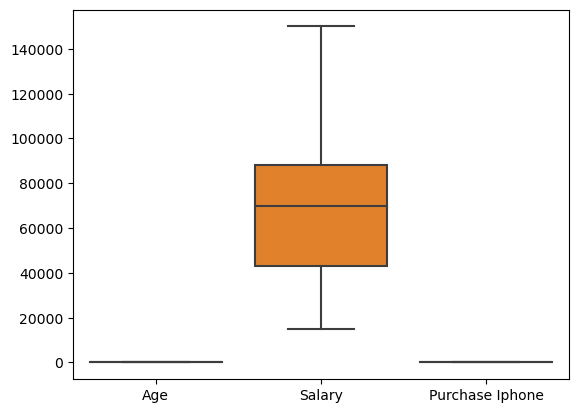

In [25]:
## Checking the outliers
sns.boxplot(data=df[['Age','Salary','Purchase Iphone']])

<Axes: ylabel='Age'>

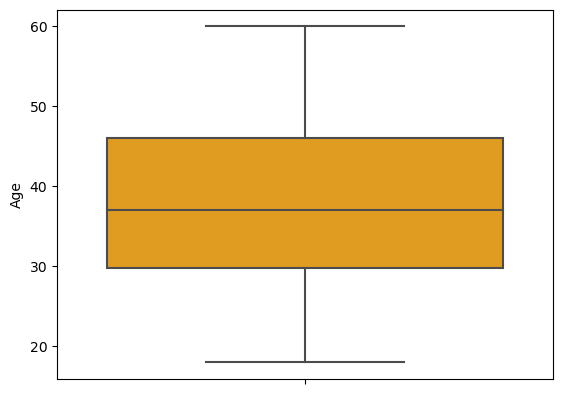

In [28]:
sns.boxplot(y='Age', data=df, color='Orange')

<Axes: ylabel='Salary'>

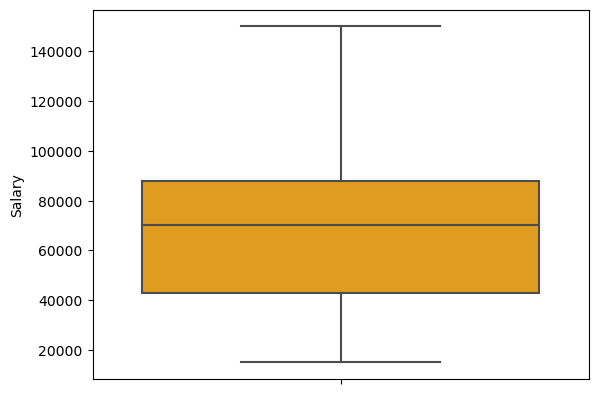

In [30]:
sns.boxplot(y='Salary', data=df, color='Orange')

<Axes: xlabel='Gender', ylabel='Age'>

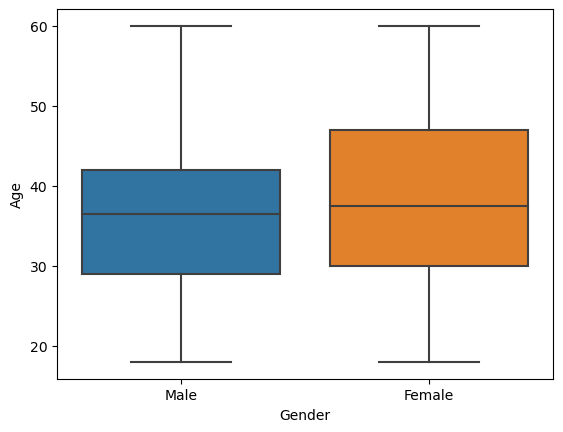

In [31]:
sns.boxplot(x='Gender',y='Age',data=df)

<Axes: xlabel='Gender', ylabel='Salary'>

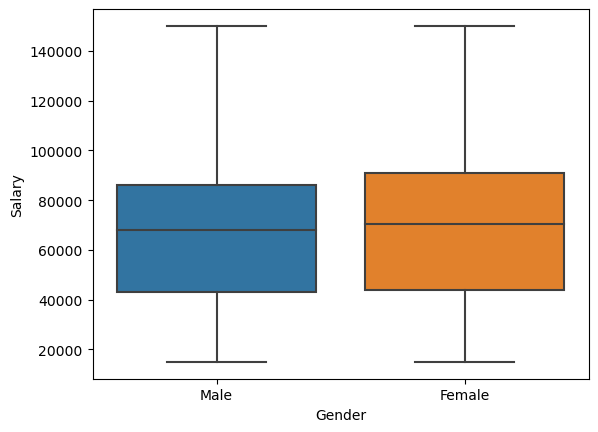

In [32]:
sns.boxplot(x='Gender',y='Salary',data=df)

C:\Users\91878\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


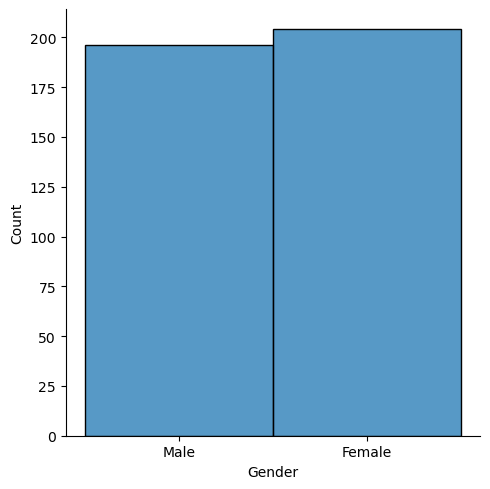

In [33]:
sns.displot(x='Gender', data=df)

C:\Users\91878\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


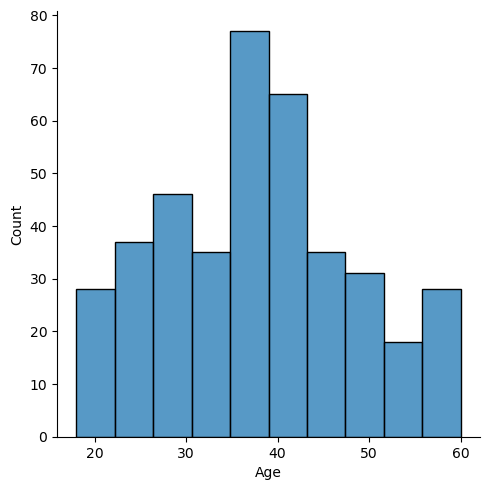

In [34]:
sns.displot(x='Age', data=df)

C:\Users\91878\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


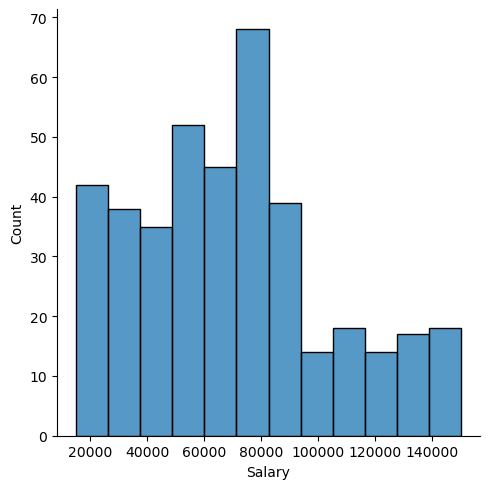

In [35]:
sns.displot(x='Salary',data=df)

<Axes: >

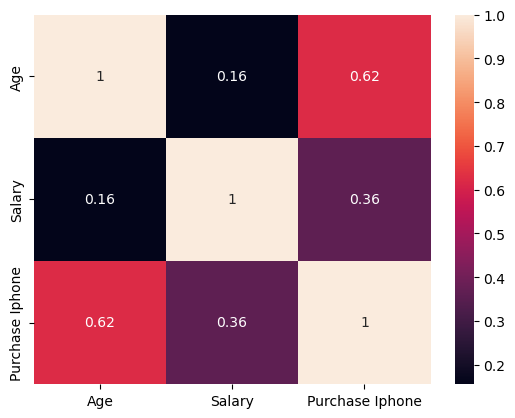

In [38]:
sns.heatmap(df[['Age','Salary','Purchase Iphone']].corr(), annot=True)

In [5]:
# Let's divide the dataframe by gender column, i.e. into Male and Female
male=df[df['Gender']=='Male']
female=df[df['Gender']=='Female']

In [43]:
print(male)

    Gender  Age  Salary  Purchase Iphone
0     Male   19   19000                0
1     Male   35   20000                0
4     Male   19   76000                0
5     Male   27   58000                0
8     Male   25   33000                0
..     ...  ...     ...              ...
390   Male   48   33000                1
391   Male   47   23000                1
393   Male   60   42000                1
396   Male   51   23000                1
398   Male   36   33000                0

[196 rows x 4 columns]


In [44]:
print(female)

     Gender  Age  Salary  Purchase Iphone
2    Female   26   43000                0
3    Female   27   57000                0
6    Female   27   84000                0
7    Female   32  150000                1
9    Female   35   65000                0
..      ...  ...     ...              ...
392  Female   45   45000                1
394  Female   39   59000                0
395  Female   46   41000                1
397  Female   50   20000                1
399  Female   49   36000                1

[204 rows x 4 columns]


In [46]:
female.describe()

,Age,Salary,Purchase Iphone
count,204.000000,204.000000,204.000000
mean,38.411765,71759.803922,0.377451
std,10.859019,35595.236189,0.485942
min,18.000000,15000.000000,0.000000
25%,30.000000,44000.000000,0.000000
50%,37.500000,70500.000000,0.000000
75%,47.000000,90750.000000,1.000000
max,60.000000,150000.000000,1.000000


In [47]:
male.describe()

,Age,Salary,Purchase Iphone
count,196.000000,196.000000,196.000000
mean,36.867347,67642.857143,0.336735
std,10.043636,32421.819181,0.473804
min,18.000000,15000.000000,0.000000
25%,29.000000,43000.000000,0.000000
50%,36.500000,68000.000000,0.000000
75%,42.000000,86000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [48]:
female['Purchase Iphone'].value_counts()

Purchase Iphone
0    127
1     77
Name: count, dtype: int64

In [49]:
male['Purchase Iphone'].value_counts()

Purchase Iphone
0    130
1     66
Name: count, dtype: int64

In [51]:
female['Age'].unique()

array([26, 27, 32, 35, 48, 47, 45, 21, 28, 33, 31, 24, 18, 29, 23, 59, 22,
       20, 30, 19, 38, 39, 37, 36, 40, 41, 34, 58, 55, 52, 46, 60, 42, 53,
       50, 56, 51, 57, 44, 43, 49, 54], dtype=int64)

In [52]:
male['Age'].unique()

array([19, 35, 27, 25, 20, 32, 18, 29, 47, 45, 46, 48, 49, 31, 30, 23, 28,
       22, 24, 34, 39, 26, 21, 38, 37, 42, 40, 36, 41, 33, 52, 59, 60, 56,
       57, 55, 58, 53, 54, 43, 51], dtype=int64)

## Building the model using KNN

In [54]:
data.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [6]:
X=df[['Age','Salary']]
y=df['Purchase Iphone']

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
acc=[]
for i in range(1,21):
    clf=KNeighborsClassifier(n_neighbors=i)
    model=clf.fit(X,y)
    predict_i=model.predict(X)
    acc.append(accuracy_score(y,predict_i))
    print('k=',i,acc)

k= 1 [0.995]
k= 2 [0.995, 0.9]
k= 3 [0.995, 0.9, 0.8975]
k= 4 [0.995, 0.9, 0.8975, 0.8625]
k= 5 [0.995, 0.9, 0.8975, 0.8625, 0.8725]
k= 6 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625]
k= 7 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87]
k= 8 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475]
k= 9 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725]
k= 10 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475]
k= 11 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475, 0.8325]
k= 12 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475, 0.8325, 0.825]
k= 13 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475, 0.8325, 0.825, 0.845]
k= 14 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475, 0.8325, 0.825, 0.845, 0.8425]
k= 15 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475, 0.8325, 0.825, 0.845, 0.8425, 0.8325]
k= 16 [0.995, 0.9, 0.8975,

In [13]:
max(acc)

0.995

In [23]:
## Checking the value of K where accuracy is maximum
k=acc.index(max(acc))+1
print("Model is accurate when K value is ", k)

Model is accurate when K value is  1


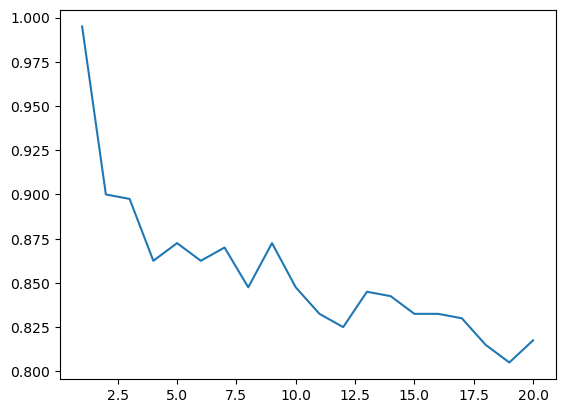

In [24]:
plt.plot(range(1,21),acc)

### Let's check for Gender wise also


#### MALE

In [25]:
print(male)

    Gender  Age  Salary  Purchase Iphone
0     Male   19   19000                0
1     Male   35   20000                0
4     Male   19   76000                0
5     Male   27   58000                0
8     Male   25   33000                0
..     ...  ...     ...              ...
390   Male   48   33000                1
391   Male   47   23000                1
393   Male   60   42000                1
396   Male   51   23000                1
398   Male   36   33000                0

[196 rows x 4 columns]


In [29]:
X= male[['Age', 'Salary']]
y = male[['Purchase Iphone']]

In [30]:
acc=[]
for i in range(1,21):
    clf=KNeighborsClassifier(n_neighbors=i)
    model=clf.fit(X,y)
    predict_i=model.predict(X)
    acc.append(accuracy_score(y,predict_i))
    print('k=',i,acc)

C:\Users\91878\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91878\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91878\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91878\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

k= 1 [1.0]
k= 2 [1.0, 0.8979591836734694]
k= 3 [1.0, 0.8979591836734694, 0.8673469387755102]
k= 4 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898]
k= 5 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898]
k= 6 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898, 0.8571428571428571]
k= 7 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898, 0.8571428571428571, 0.8622448979591837]
k= 8 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898, 0.8571428571428571, 0.8622448979591837, 0.8469387755102041]
k= 9 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898, 0.8571428571428571, 0.8622448979591837, 0.8469387755102041, 0.826530612244898]
k= 10 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898, 0.8571428571428571, 0.8622448979591837, 0.8469387755102041, 0.826530612244898, 0.826530612244898]

C:\Users\91878\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91878\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91878\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91878\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [32]:
max(acc)
k=acc.index(max(acc))+1
print("Model is accurate when K value is ", k)
print(max(acc))

Model is accurate when K value is  1
1.0


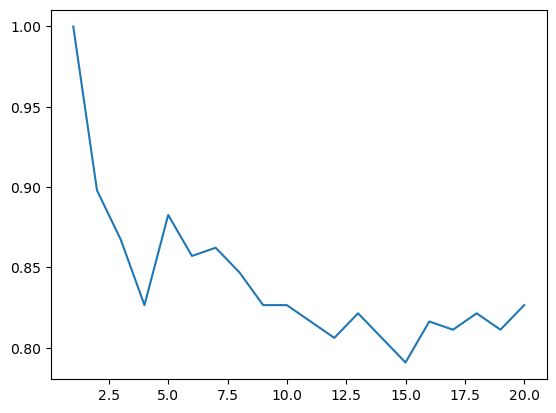

In [33]:
plt.plot(range(1,21),acc)